11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 66s 131ms/step - loss: 0.3008 - accuracy: 0.9090 - val_loss: 0.0617 - val_accuracy: 0.9813
Epoch 2/10
469/469 [==============================] - 49s 105ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.0439 - val_accuracy: 0.9846
Epoch 3/10
469/469 [==============================] - 50s 106ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0337 - val_accuracy: 0.9885
Epoch 4/10
469/469 [==============================] - 51s 109ms/step - loss: 0.0567 - accuracy: 0.9832 - val_loss: 0.0287 - val_accuracy: 0.9897
Epoch 5/10
469/469 [==============================] - 50s 107ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0251 - val_accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 49s 106ms/step - loss: 0.0404 - accuracy: 0.9873 - val_loss: 0.0272 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 50s 106ms/s

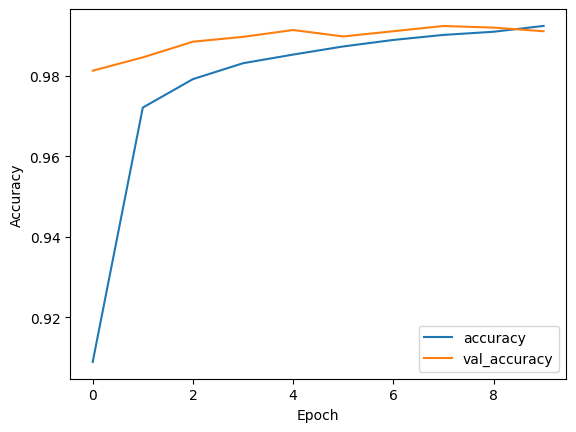

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
